In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

### First look at data

In [12]:
df = pd.read_csv('../data/01_raw/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
int(df.duplicated().sum())

1081

In [16]:
df[df.duplicated()==True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [46]:
df.isnull().sum().max()

np.int64(0)

In [47]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

No null values.

### Explenatory data analysis

/tmp/ipykernel_192437/3320891814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette=('#FFFF00','#800080'))


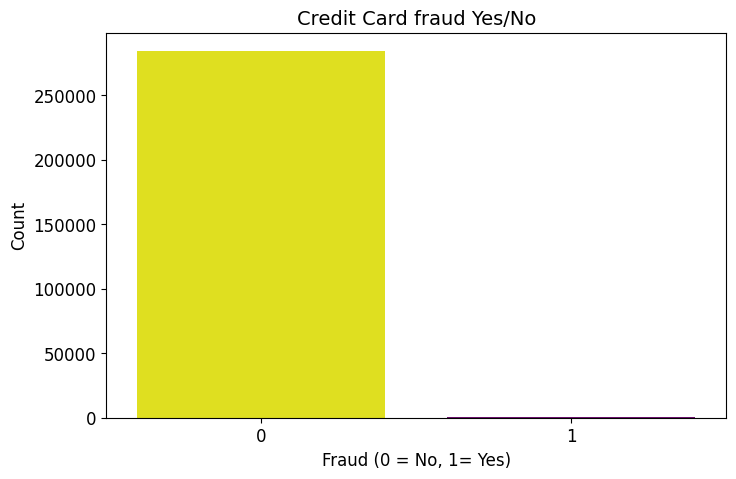

In [26]:
plt.figure(figsize=(8,5))
plt.title('Credit Card fraud Yes/No', fontsize=14)
# outcome takes specific outcome and counts the rows
sns.countplot(x="Class", data=df, palette=('#FFFF00','#800080'))
plt.xlabel("Fraud (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [48]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


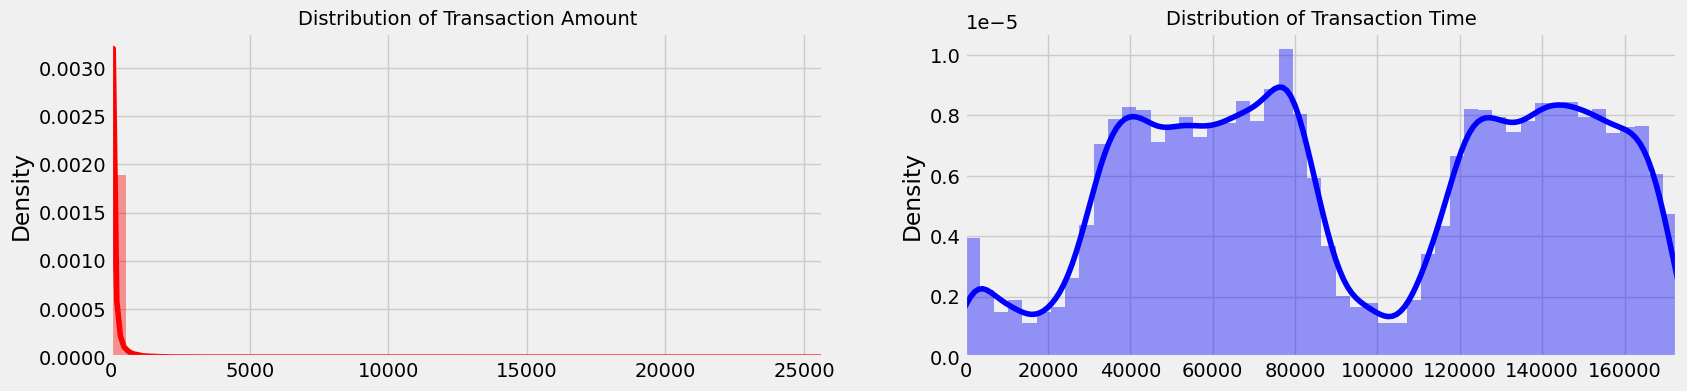

In [52]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.


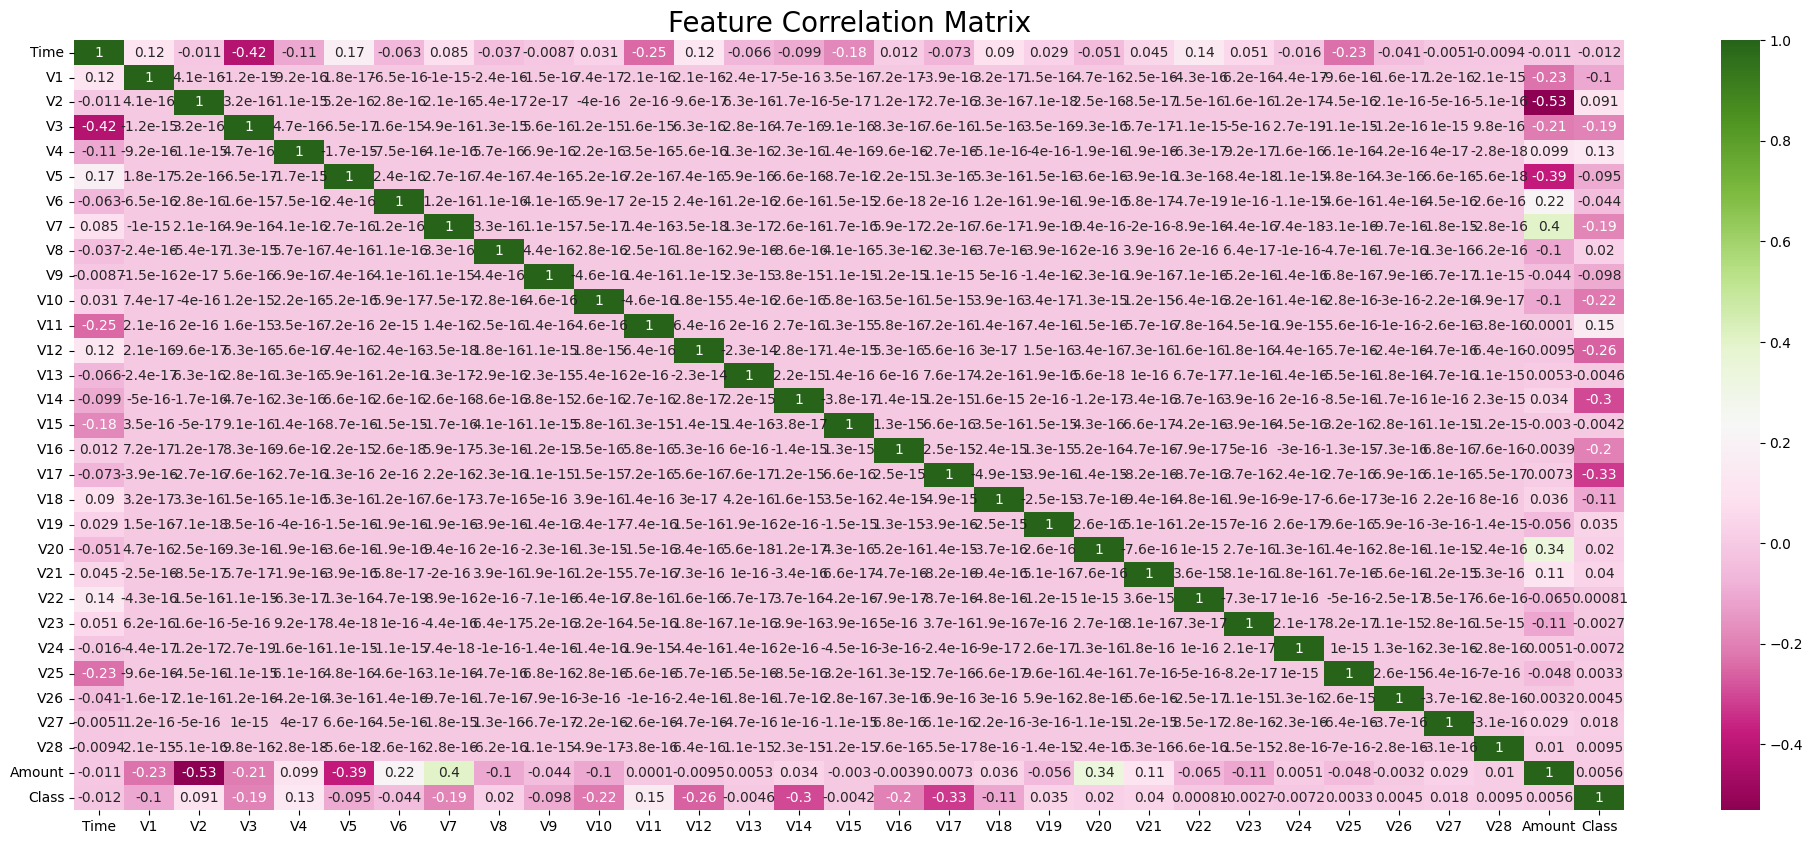

In [36]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

NameError: name 'correlation_matrix' is not defined

In [45]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Transaction amount

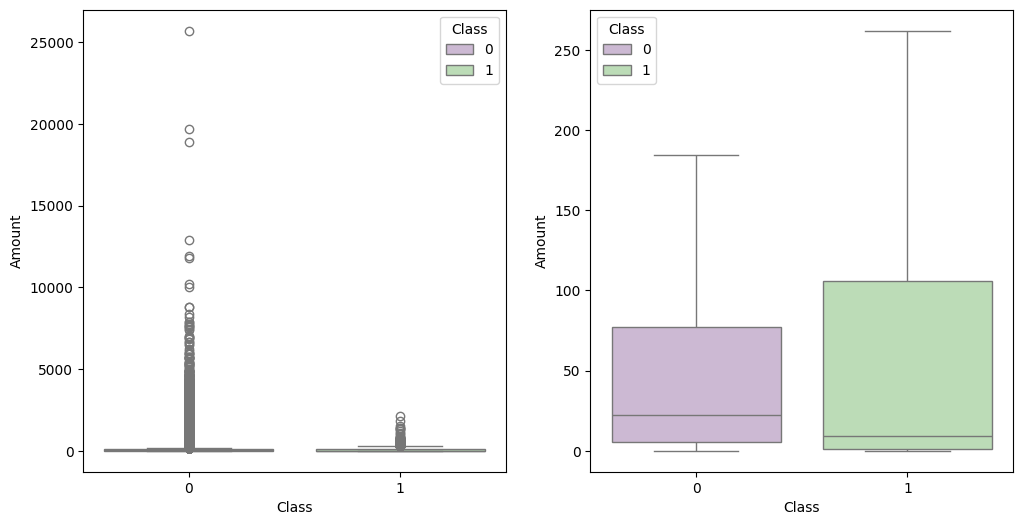

In [7]:
#https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models#Features-correlation
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

In [9]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Feature Selection - Information gain

Information Gain (Mutual Information)

Measures how much knowing a feature reduces uncertainty about the class.

It is univariate (considers one feature at a time).

It cannot account for interactions or redundancy between features.

/tmp/ipykernel_32491/1748219146.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


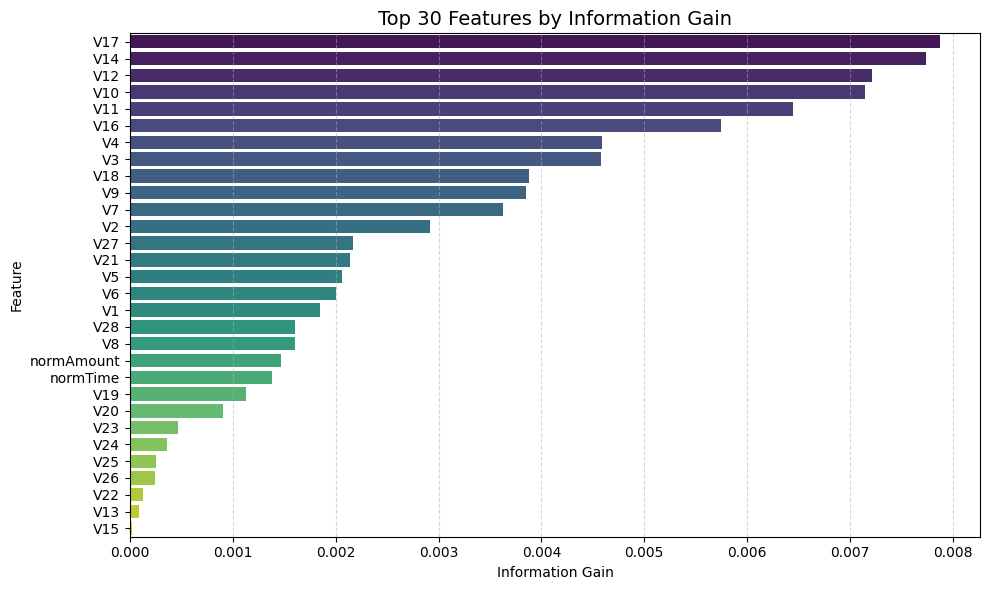

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results
ig_scores = pd.read_csv("../data/08_reporting/information_gain_scores.csv")

# Optional: limit to top N features
top_n = 30
ig_top = ig_scores.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="information_gain", 
    y="feature", 
    data=ig_top,
    palette="viridis"
)
plt.title(f"Top {top_n} Features by Information Gain", fontsize=14)
plt.xlabel("Information Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

### Extra trees importance

ExtraTrees / Random Forest

Based on ensemble decision trees.

Considers feature importance through impurity reduction across all trees.

It’s multivariate: takes feature interactions into account.

/tmp/ipykernel_56297/2549660260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=extra_trees_df.head(30), x="importance", y="feature", palette="viridis")


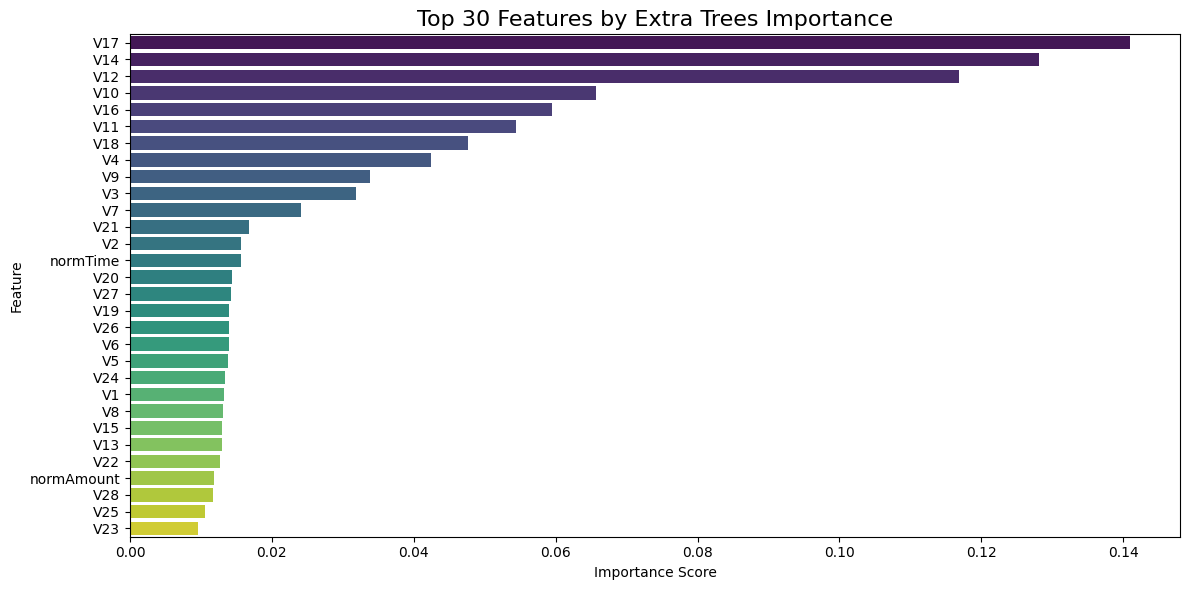

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved feature importance file
extra_trees_df = pd.read_csv("../data/08_reporting/extra_trees_importance.csv")

# Sort features by importance
extra_trees_df = extra_trees_df.sort_values(by="importance", ascending=False)

# Plot the top N important features
plt.figure(figsize=(12, 6))
sns.barplot(data=extra_trees_df.head(30), x="importance", y="feature", palette="viridis")
plt.title("Top 30 Features by Extra Trees Importance", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### LightGMB feature importance

LightGBM Feature Importance

Similar to ExtraTrees, but uses gradient boosting instead of bagging.

Captures complex nonlinear dependencies and feature interactions.

May assign high importance to features with no strong individual signal if they’re useful in combination.

/tmp/ipykernel_56297/1442764783.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=df_top, palette="viridis")


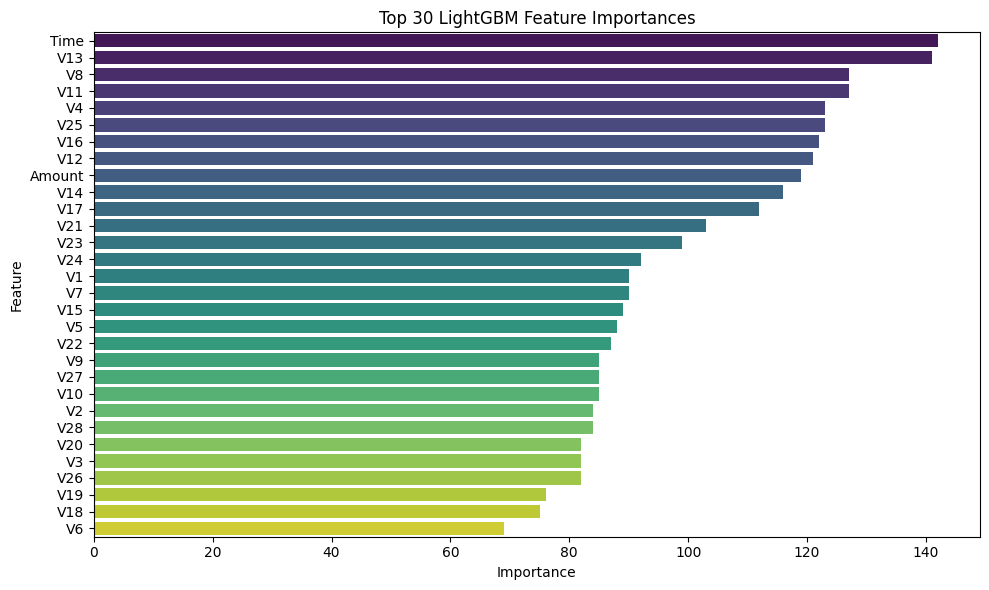

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved feature importance results
df = pd.read_csv("../data/08_reporting/lightgbm_feature_importance.csv")

# Optional: Limit to top 20 features
top_n = 30
df_top = df.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=df_top, palette="viridis")
plt.title(f"Top {top_n} LightGBM Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


/tmp/ipykernel_56297/263231082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=df_top, palette="viridis")


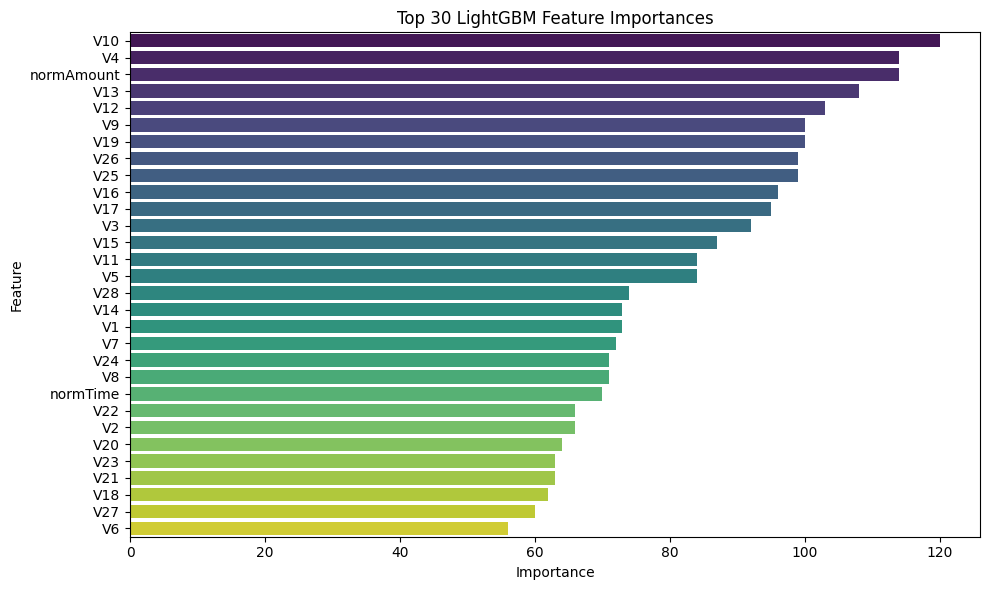

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved feature importance results
df = pd.read_csv("../data/08_reporting/lightgbm_feature_importance_norm.csv")

# Optional: Limit to top 20 features
top_n = 30
df_top = df.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=df_top, palette="viridis")
plt.title(f"Top {top_n} LightGBM Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Feature vectors

In [20]:
import pickle

with open("../data/04_feature/selected_feature_vectors.pkl/2025-06-21T17.01.42.540Z/selected_feature_vectors.pkl", "rb") as f:
    feature_vectors = pickle.load(f)

feature_vectors['intersection_2plus']

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2', 'V21']

In [21]:
import pickle

with open("../data/04_feature/selected_feature_vectors.pkl/2025-06-21T17.16.44.648Z/selected_feature_vectors.pkl", "rb") as f:
    feature_vectors = pickle.load(f)

feature_vectors['intersection_2plus']


[
    'V17',
    'V14',
    'V12',
    'V10',
    'V16',
    'V3',
    'V7',
    'V11',
    'V4',
    'V18',
    'V1',
    'V9',
    'V5',
    'V2',
    'V21',
    'V13',
    'V25'
]

In [1]:
import pandas as pd
df_feature_sets = pd.read_csv('../data/08_reporting/model_evaluation_results_across_features.csv')

In [4]:
df_feature_sets

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
0,AdaBoost,lgbm_top_norm_25,0.977956,0.514591,0.714461,0.771428,0.665913,0.999112,25
1,AdaBoost,lgbm_top_25,0.977736,0.512014,0.713286,0.763160,0.670146,0.999101,25
2,AdaBoost,lgbm_top_10,0.977729,0.488073,0.686691,0.832193,0.585442,0.999112,10
3,AdaBoost,lgbm_top_15,0.976934,0.520313,0.717896,0.785632,0.661680,0.999133,15
4,AdaBoost,lgbm_top_20,0.976627,0.519109,0.716642,0.788307,0.657469,0.999133,20
...,...,...,...,...,...,...,...,...,...
211,XGBoost,intersection_2plus_25,0.909515,0.640964,0.795616,0.862719,0.741814,0.999369,31
212,XGBoost,lgbm_top_norm_15,0.864018,0.536359,0.659799,0.731907,0.601008,0.998932,15
213,XGBoost,intersection_2plus_20,0.856115,0.566251,0.672995,0.738456,0.622732,0.999189,27
214,XGBoost,lgbm_top_norm_25,0.818043,0.519545,0.649078,0.703054,0.605263,0.998640,25


In [11]:
# Sort by F1-score
top_f1 = df_feature_sets.sort_values(by="f1_score", ascending=False).head(10)

# Sort by PR-AUC
top_pr_auc = df_feature_sets.sort_values(by="pr_auc", ascending=False).head(10)

# Sort by ROC-AUC
top_roc_auc = df_feature_sets.sort_values(by="roc_auc", ascending=False).head(10)

# Best by model
best_by_model_f1 = df_feature_sets.loc[df_feature_sets.groupby("model")["f1_score"].idxmax()]
best_by_model_precision = df_feature_sets.loc[df_feature_sets.groupby("model")["precision"].idxmax()]
best_by_model_recall = df_feature_sets.loc[df_feature_sets.groupby("model")["recall"].idxmax()]


In [7]:
top_f1

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
75,KNN,corr_target_top_10,0.920599,0.747531,0.860941,0.942553,0.792744,0.999574,10
31,CatBoost,lgbm_top_25,0.977917,0.744867,0.858990,0.946751,0.786383,0.999570,25
33,CatBoost,lgbm_top_norm_20,0.976523,0.744738,0.858570,0.946621,0.786338,0.999570,20
26,CatBoost,intersection_2plus_25,0.980208,0.743179,0.858173,0.942364,0.788466,0.999566,31
28,CatBoost,extra_trees_top_25,0.979160,0.742824,0.857570,0.946993,0.784233,0.999566,25
189,RandomForest,info_gain_top_10,0.937273,0.741602,0.857304,0.940116,0.788555,0.999563,10
36,CatBoost,extra_trees_top_20,0.975289,0.742449,0.856957,0.951691,0.780022,0.999566,20
29,CatBoost,info_gain_top_25,0.979130,0.740588,0.856307,0.946449,0.782172,0.999563,25
25,CatBoost,intersection_2plus_20,0.980289,0.740449,0.855717,0.948981,0.779978,0.999563,27
30,CatBoost,corr_target_top_25,0.977960,0.738505,0.855015,0.946418,0.780067,0.999559,25


In [8]:
top_pr_auc

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
75,KNN,corr_target_top_10,0.920599,0.747531,0.860941,0.942553,0.792744,0.999574,10
31,CatBoost,lgbm_top_25,0.977917,0.744867,0.858990,0.946751,0.786383,0.999570,25
33,CatBoost,lgbm_top_norm_20,0.976523,0.744738,0.858570,0.946621,0.786338,0.999570,20
26,CatBoost,intersection_2plus_25,0.980208,0.743179,0.858173,0.942364,0.788466,0.999566,31
28,CatBoost,extra_trees_top_25,0.979160,0.742824,0.857570,0.946993,0.784233,0.999566,25
36,CatBoost,extra_trees_top_20,0.975289,0.742449,0.856957,0.951691,0.780022,0.999566,20
189,RandomForest,info_gain_top_10,0.937273,0.741602,0.857304,0.940116,0.788555,0.999563,10
29,CatBoost,info_gain_top_25,0.979130,0.740588,0.856307,0.946449,0.782172,0.999563,25
25,CatBoost,intersection_2plus_20,0.980289,0.740449,0.855717,0.948981,0.779978,0.999563,27
30,CatBoost,corr_target_top_25,0.977960,0.738505,0.855015,0.946418,0.780067,0.999559,25


In [9]:
top_roc_auc

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
24,CatBoost,lgbm_top_norm_25,0.983214,0.738297,0.854519,0.948711,0.777895,0.999559,25
25,CatBoost,intersection_2plus_20,0.980289,0.740449,0.855717,0.948981,0.779978,0.999563,27
26,CatBoost,intersection_2plus_25,0.980208,0.743179,0.858173,0.942364,0.788466,0.999566,31
27,CatBoost,lgbm_top_20,0.979722,0.726404,0.847708,0.938450,0.773617,0.999538,20
28,CatBoost,extra_trees_top_25,0.979160,0.742824,0.857570,0.946993,0.784233,0.999566,25
29,CatBoost,info_gain_top_25,0.979130,0.740588,0.856307,0.946449,0.782172,0.999563,25
30,CatBoost,corr_target_top_25,0.977960,0.738505,0.855015,0.946418,0.780067,0.999559,25
0,AdaBoost,lgbm_top_norm_25,0.977956,0.514591,0.714461,0.771428,0.665913,0.999112,25
31,CatBoost,lgbm_top_25,0.977917,0.744867,0.858990,0.946751,0.786383,0.999570,25
1,AdaBoost,lgbm_top_25,0.977736,0.512014,0.713286,0.763160,0.670146,0.999101,25


In [12]:
best_by_model_f1

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
21,AdaBoost,lgbm_top_norm_15,0.972434,0.533441,0.726066,0.804668,0.661613,0.999168,15
31,CatBoost,lgbm_top_25,0.977917,0.744867,0.858990,0.946751,0.786383,0.999570,25
54,DecisionTree,info_gain_top_15,0.878237,0.597310,0.771225,0.788337,0.756820,0.999249,15
75,KNN,corr_target_top_10,0.920599,0.747531,0.860941,0.942553,0.792744,0.999574,10
102,LightGBM,lgbm_top_10,0.751740,0.229105,0.456050,0.371742,0.613102,0.997491,10
139,LogisticRegression,intersection_2plus_25,0.971905,0.540935,0.723671,0.872424,0.619306,0.999214,31
144,NaiveBayes,lgbm_top_10,0.970898,0.196326,0.413840,0.309379,0.634177,0.996965,10
189,RandomForest,info_gain_top_10,0.937273,0.741602,0.857304,0.940116,0.788555,0.999563,10
192,XGBoost,lgbm_top_20,0.949988,0.686782,0.824718,0.907350,0.756797,0.999464,20


In [13]:
best_by_model_precision

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
2,AdaBoost,lgbm_top_10,0.977729,0.488073,0.686691,0.832193,0.585442,0.999112,10
36,CatBoost,extra_trees_top_20,0.975289,0.742449,0.856957,0.951691,0.780022,0.999566,20
54,DecisionTree,info_gain_top_15,0.878237,0.597310,0.771225,0.788337,0.756820,0.999249,15
90,KNN,intersection_2plus_25,0.630629,0.071338,0.129826,1.000000,0.069787,0.998449,31
102,LightGBM,lgbm_top_10,0.751740,0.229105,0.456050,0.371742,0.613102,0.997491,10
128,LogisticRegression,info_gain_top_10,0.973387,0.516616,0.704194,0.874912,0.589765,0.999175,10
144,NaiveBayes,lgbm_top_10,0.970898,0.196326,0.413840,0.309379,0.634177,0.996965,10
169,RandomForest,intersection_2plus_25,0.945468,0.736474,0.853172,0.949363,0.775812,0.999556,31
192,XGBoost,lgbm_top_20,0.949988,0.686782,0.824718,0.907350,0.756797,0.999464,20


In [14]:
best_by_model_recall

,model,feature_set,roc_auc,pr_auc,f1_score,precision,recall,accuracy,n_features
15,AdaBoost,corr_target_top_20,0.974331,0.522232,0.720227,0.770960,0.676484,0.999122,20
44,CatBoost,info_gain_top_10,0.968928,0.701255,0.835673,0.886627,0.790638,0.999482,10
48,DecisionTree,corr_target_top_25,0.885672,0.594388,0.769347,0.768362,0.771736,0.999228,25
75,KNN,corr_target_top_10,0.920599,0.747531,0.860941,0.942553,0.792744,0.999574,10
96,LightGBM,extra_trees_top_25,0.820277,0.166212,0.337129,0.250152,0.672184,0.993977,25
139,LogisticRegression,intersection_2plus_25,0.971905,0.540935,0.723671,0.872424,0.619306,0.999214,31
152,NaiveBayes,extra_trees_top_15,0.964490,0.072880,0.155500,0.085611,0.847749,0.984630,15
189,RandomForest,info_gain_top_10,0.937273,0.741602,0.857304,0.940116,0.788555,0.999563,10
200,XGBoost,info_gain_top_20,0.934554,0.679524,0.821715,0.877393,0.773751,0.999440,20


In [7]:
import pandas as pd
df_resampling_res = pd.read_csv('../data/08_reporting/model_resampling_results.csv')
df_resampling_res_all = pd.read_csv('../data/08_reporting/model_resampling_results_all_features.csv')

df_resampling_ee = pd.read_csv('../data/08_reporting/model_custom_easy_ensamble_results.csv')
df_resampling_ee_all = pd.read_csv('../data/08_reporting/model_custom_easy_ensamble_results_all_features.csv')

In [2]:
df_resampling_res

,model,feature_set,resampler,recall,precision,f1_score,roc_auc,pr_auc,accuracy,training_time,n_features
0,CatBoost,lgbm_top_25,SMOTE,0.843471,0.703290,0.766187,0.972311,0.592991,0.999140,185.803744,25
1,CatBoost,lgbm_top_25,RandomOverSampler,0.832945,0.751055,0.789633,0.969781,0.625712,0.999260,178.294934,25
2,CatBoost,lgbm_top_25,RandomUnderSampler,0.902755,0.051716,0.097766,0.980741,0.046844,0.971867,20.511529,25
3,KNN,corr_target_top_10,SMOTE,0.852027,0.347587,0.493400,0.927338,0.296190,0.997078,39.804395,10
4,KNN,corr_target_top_10,RandomOverSampler,0.826607,0.677044,0.743693,0.920517,0.559562,0.999048,34.361755,10
5,KNN,corr_target_top_10,RandomUnderSampler,0.885823,0.060490,0.113133,0.967601,0.053947,0.976379,8.005976,10
6,RandomForest,info_gain_top_10,SMOTE,0.809675,0.797595,0.803086,0.963736,0.645881,0.999337,290.246260,10
7,RandomForest,info_gain_top_10,RandomOverSampler,0.784278,0.932533,0.851823,0.942415,0.731841,0.999545,151.272355,10
8,RandomForest,info_gain_top_10,RandomUnderSampler,0.898522,0.044519,0.084800,0.972458,0.040144,0.967377,1.230144,10
9,XGBoost,lgbm_top_20,SMOTE,0.837133,0.778981,0.806693,0.975173,0.652431,0.999330,12.665604,20


In [2]:
df_resampling_res_all

,model,feature_set,resampler,recall,precision,f1_score,roc_auc,pr_auc,accuracy,training_time,n_features
0,RandomForest,all_features,SMOTE,0.820179,0.882789,0.849982,0.969720,0.724649,0.999517,528.101375,32
1,RandomForest,all_features,RandomOverSampler,0.765151,0.938200,0.842239,0.951622,0.718263,0.999524,251.184294,32
2,RandomForest,all_features,RandomUnderSampler,0.896439,0.059144,0.110823,0.975815,0.053331,0.975371,2.762691,32
3,KNN,all_features,SMOTE,0.520090,0.015539,0.030176,0.747872,0.008893,0.944277,608.994312,32
4,KNN,all_features,RandomOverSampler,0.181680,0.162275,0.171273,0.592748,0.032417,0.997057,607.570801,32
5,KNN,all_features,RandomUnderSampler,0.619552,0.002932,0.005836,0.679852,0.002459,0.648221,6.818931,32
6,XGBoost,all_features,SMOTE,0.837111,0.830779,0.833763,0.979613,0.696106,0.999443,17.849523,32
7,XGBoost,all_features,RandomOverSampler,0.816013,0.915015,0.862362,0.977173,0.747008,0.999566,16.945643,32
8,XGBoost,all_features,RandomUnderSampler,0.906988,0.037498,0.071946,0.976559,0.034194,0.959796,2.076249,32
9,CatBoost,all_features,SMOTE,0.837133,0.668464,0.742872,0.970480,0.560298,0.999031,187.389323,32


In [6]:
df = pd.concat([df_resampling_res, df_resampling_res_all])
df.loc[df.groupby("model")["f1_score"].idxmax()]

,model,feature_set,resampler,recall,precision,f1_score,roc_auc,pr_auc,accuracy,training_time,n_features
10,XGBoost,lgbm_top_20,RandomOverSampler,0.813863,0.901757,0.855446,0.975159,0.734614,0.999542,12.032808,20
10,CatBoost,all_features,RandomOverSampler,0.832923,0.781031,0.805454,0.965892,0.650801,0.999327,185.865219,32
4,KNN,corr_target_top_10,RandomOverSampler,0.826607,0.677044,0.743693,0.920517,0.559562,0.999048,34.361755,10
4,KNN,all_features,RandomOverSampler,0.181680,0.162275,0.171273,0.592748,0.032417,0.997057,607.570801,32
7,RandomForest,info_gain_top_10,RandomOverSampler,0.784278,0.932533,0.851823,0.942415,0.731841,0.999545,151.272355,10
7,XGBoost,all_features,RandomOverSampler,0.816013,0.915015,0.862362,0.977173,0.747008,0.999566,16.945643,32
7,RandomForest,info_gain_top_10,RandomOverSampler,0.784278,0.932533,0.851823,0.942415,0.731841,0.999545,151.272355,10
7,XGBoost,all_features,RandomOverSampler,0.816013,0.915015,0.862362,0.977173,0.747008,0.999566,16.945643,32


In [4]:
df_resampling_ee

,model,feature_set,resampler,roc_auc,pr_auc,f1,precision,recall,accuracy,training_time,n_features,n_subsets
0,CatBoost,lgbm_top_25,CustomEasyEnsemble,0.980961,0.931472,0.940605,0.974398,0.909503,0.942711,205.808625,24,10
1,KNN,corr_target_top_10,CustomEasyEnsemble,0.967949,0.922902,0.931611,0.972842,0.894267,0.934564,1.191555,9,10
2,RandomForest,info_gain_top_10,CustomEasyEnsemble,0.973614,0.920861,0.931344,0.969465,0.896833,0.933933,4.346819,9,10
3,XGBoost,lgbm_top_20,CustomEasyEnsemble,0.978070,0.918783,0.934826,0.959146,0.912258,0.936472,2.253595,19,10


In [8]:
df_resampling_ee_all

,model,feature_set,resampler,roc_auc,pr_auc,f1,precision,recall,accuracy,training_time,n_features,n_subsets
0,RandomForest,all_features,CustomEasyEnsemble,0.977801,0.926623,0.934462,0.975617,0.897254,0.937216,11.288197,32,10
1,KNN,all_features,CustomEasyEnsemble,0.683676,0.591101,0.639070,0.640211,0.641073,0.639675,1.272553,32,10
2,XGBoost,all_features,CustomEasyEnsemble,0.979629,0.921398,0.936346,0.961657,0.912887,0.938056,2.800623,32,10
3,CatBoost,all_features,CustomEasyEnsemble,0.981769,0.931671,0.939292,0.977205,0.904643,0.941652,235.277629,32,10
